In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

# Create graph
sess = tf.Session()

# Create the data
x_vals = np.linspace(-10, 10, 100)
y_vals = 2*x_vals**2 + np.random.normal(0, 3, 100)

# Create design matrix
squared_column = np.transpose(np.matrix(x_vals**2))
x_vals_column  = np.transpose(np.matrix(x_vals))
ones_column    = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((squared_column, x_vals_column, ones_column))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:

# Create b matrix
b = np.transpose(np.matrix(y_vals))

# Create tensors
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

# Matrix inverse solution
tA_A     = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A_inv = tf.matrix_inverse(tA_A)
product  = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
solution = tf.matmul(product, b_tensor)

solution_eval = sess.run(solution)


squared: 1.9911262660116984
slope: 0.01476191325782189
y_intercept: -0.20790486657414764


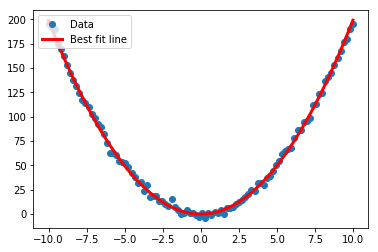

In [3]:
# Extract coefficients
squared = solution_eval[0][0]
slope = solution_eval[1][0]
y_intercept = solution_eval[2][0]

print('squared: ' + str(squared))
print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

# Get best fit line
best_fit = []
for i in x_vals:
  best_fit.append(squared*i**2 + slope*i + y_intercept)

# Plot the results
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()